In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("USA_Housing.csv")
data.sample(6)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
2412,72099.665390,5.546065,6.466645,3.41,36902.145390,1.411054e+06,"636 Smith Greens\nAlexland, AK 05521"
423,73930.839946,5.281561,7.681342,4.16,42702.403279,1.363087e+06,"6182 Hannah Locks Apt. 664\nEmilyside, PA 31748"
3647,65692.618196,6.464477,7.861412,6.16,39934.516974,1.416239e+06,Unit 6429 Box 3831\nDPO AA 61324-4127
234,69607.133665,7.077681,7.833081,3.35,34609.040215,1.514350e+06,"8781 Robert Lakes Suite 880\nEast Wendy, ID 51813"
2000,55813.296473,8.318992,7.726407,6.04,22779.369949,1.164497e+06,"65858 Simmons Coves Apt. 430\nEast Garyshire, ..."
617,62699.439217,6.358747,7.460135,4.28,37816.337696,1.306368e+06,"0454 Humphrey Forks\nNorth Paulville, NJ 17081"


In [ ]:
data.shape

(5000, 7)

In [ ]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [ ]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

<Axes: >

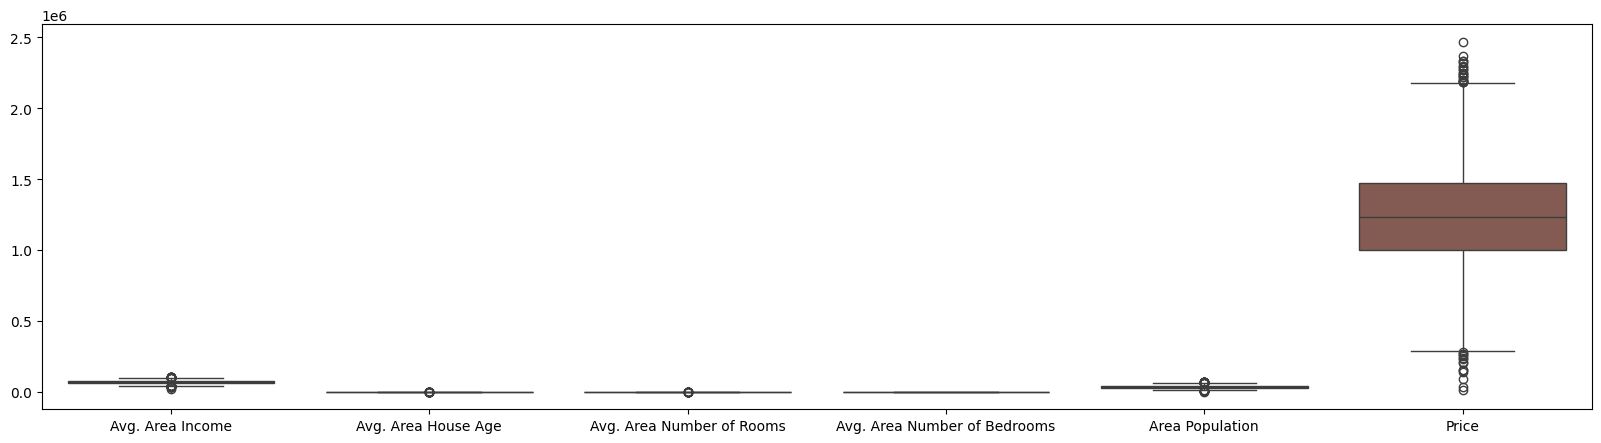

In [ ]:
plt.figure(figsize=(20,5))
# sns.heatmap(data.corr(),annot=True)
sns.boxplot(data)

In [ ]:
# for one in data.columns:
#   if data[one].dtype != "object":
#    plt.figure(figsize=(10, 5))
#    sns.boxplot(data[one])

In [ ]:
data.drop("Address", inplace=True, axis=1)



---

## Let's prepare the Model for Traning :)

In [ ]:
# Data Splitting

x = data.drop("Price", axis=1)
y = data["Price"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

line_reg = LinearRegression()

line_reg.fit(x_train, y_train)


LinearRegression()

In [ ]:
# Let's Predict the values
pred_output = line_reg.predict(x_test)
pred_output

array([1257919.729097  ,  822112.41884197, 1740669.05865495,
        972452.12917494,  993422.26329315,  644126.07414456,
       1073911.79101682,  856584.00194133, 1445318.25518365,
       1204342.19071175, 1455792.46212863, 1298556.65696433,
       1735924.33836095, 1336925.7757779 , 1387637.43231922,
       1222403.77772069,  613786.28691982,  963933.54416267,
       1221197.33050139, 1198071.57563599,  505861.89531673,
       1769106.54723353, 1853881.16842511, 1200369.50507868,
       1065129.1285072 , 1812033.73067313, 1768686.47091262,
       1439920.83814323, 1387251.99649376, 1541178.39224181,
        726418.80504278, 1754497.60908688, 1462185.72653198,
       1025600.16081145, 1284926.8685155 ,  917454.59590853,
       1187046.94956865,  999330.91117488, 1329536.63409595,
        782191.60441437, 1393272.03053841,  578216.88394851,
        822643.37151048, 1895533.11413226, 1672019.8489204 ,
        966926.45434583, 1129674.55638146,  792797.75914663,
       1161057.18412143,

In [ ]:
both_data = np.column_stack((y_test, pred_output))

for original, predicted in both_data[:10]:
  print(f"{round(original, 2)} --- {round(predicted, 2)}")

1251688.62 --- 1257919.73
873048.32 --- 822112.42
1696977.66 --- 1740669.06
1063964.29 --- 972452.13
948788.28 --- 993422.26
730043.65 --- 644126.07
1166925.15 --- 1073911.79
705444.12 --- 856584.0
1499988.88 --- 1445318.26
1288199.15 --- 1204342.19


## Residual Data Analysis

In [ ]:
residual = y_test - pred_output
residual

1718     -6231.113394
2511     50935.900800
345     -43691.395822
2521     91512.158699
54      -44633.987584
            ...      
3900      8578.803183
3753   -104601.289733
3582     38997.150646
2392   -155113.478325
3343     90915.992050
Name: Price, Length: 1000, dtype: float64

## Let's Evaluate the Model

### Linear Regression Model Evaluation Via MSE
### MSE (Mean Squared Error)




In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, pred_output)
rmse = np.sqrt(mse)

print("MSE: ", mse)
print("RMSE: ", rmse)

MSE:  10100187858.864885
RMSE:  100499.69083964829


## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

dt_reg.fit(x_train, y_train)

dt_pred_output = dt_reg.predict(x_test)

dt_mse = mean_squared_error(y_test, dt_pred_output)

print("Decision Tree Regressor: ", dt_mse)

Decision Tree Regressor:  31648891391.57867


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

rf_reg.fit(x_train, y_train)

rf_pred_output = rf_reg.predict(x_test)

rf_mse = mean_squared_error(y_test, rf_pred_output)

print("Random Forest Regressor: ", rf_mse)

Random Forest Regressor:  15129029502.624054


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

GB_Regressor = GradientBoostingRegressor()

GB_Regressor.fit(x_train, y_train)

GB_pred_output = GB_Regressor.predict(x_test)

GB_mse = mean_squared_error(y_test, GB_pred_output)

print("Gradient Boosting Regressor: ", GB_mse)

Gradient Boosting Regressor:  12389428333.079132


## Let's print all values and see which one is better

In [ ]:
all_values = {
    "Linear Regression": mse,
    "Decision Tree Regressor": dt_mse,
    "Random Forest Regressor": rf_mse,
    "Gradient Boosting Regressor": GB_mse
}

sorted_values = sorted(all_values.items(), key=lambda x: x[1])

for rank, (key, value) in enumerate(sorted_values, start=1):
    print(f"{rank}. {key}: {value}")

1. Linear Regression: 10100187858.864885
2. Gradient Boosting Regressor: 12389428333.079132
3. Random Forest Regressor: 15129029502.624054
4. Decision Tree Regressor: 31648891391.57867
